# Programmieraufgabe: Implementierung des Newton-Verfahrens

### Teil 1: Grundlegende Implementierung
Implementieren Sie das Newton-Verfahren in Julia. 

In [1]:
f(x) = -26 + 85 * x - 91 * x^2 + 44 * x^3 - 8 * x^4 + x^5
df(x) = 85 - 182 * x + 132 * x^2 - 32 * x^3 + 5 * x^4

df (generic function with 1 method)

In [ ]:
function newton(f, df, x0, tol, max_iter)
    # f: Funktion, deren Nullstelle gesucht wird
    # df: Ableitung von f
    # x0: Startwert
    # tol: Toleranz (Abbruchkriterium)
    # max_iter: Maximale Anzahl an Iterationen

    x = x0
    for i in 1:max_iter
        # Berechnung der Funktion und ihrer Ableitung an der Stelle x
        fx  = f(x)
        dfx = df(x)

        # Newton-Schritt:
        x_new = x - fx/dfx

        if abs(fx) < tol
            return x_new, i
        end
        
        x = x_new
    end

    # Rückgabe: Approximierte Nullstelle und Anzahl der benötigten Iterationen
    return x, max_iter
end

newton (generic function with 1 method)

In [4]:
x = newton(f, df, 1.0, 0.0001, 1000)
println("x = ", x)

x = (0.5570255161323902, 5)


In [5]:
x = newton(f, df, 0.0, 0.0001, 1000)
println("x = ", x)

x = (0.5570255051379259, 5)


In [6]:
x = newton(f, df, 5.0, 0.0001, 1000)
println("x = ", x)

x = (0.5570255157731352, 10)


### Teil 2: Automatische Differentiation 
Erweitern Eure Implementierung, um die manuelle Eingabe der Ableitung überflüssig zu machen. Verwenden Sie dazu das Package `TaylorSeries` in Julia, um die Ableitung automatisch zu berechnen.

In [15]:
using Pkg
Pkg.add("TaylorSeries")

   Resolving package versions...
  No Changes to `C:\Users\rober\.julia\environments\v1.11\Project.toml`
  No Changes to `C:\Users\rober\.julia\environments\v1.11\Manifest.toml`


In [20]:
using TaylorSeries
function newton_auto(f, x0, tol, max_iter)
    # Implementierung mit automatischer Differentiation
    x  = x0
    x_iters = [x]
    for i in 1:max_iter
        # Taylor-Entwicklung 1. Grades um x:
        func_t = taylor_expand(f, x, order=1)
        dfunc_t = differentiate(func_t)

        # Auswerung an Stelle x:
        fx = f(x)
        dfx = dfunc_t(x)

        if abs(fx) < tol
            return x, i, x_iters
        end
        
        # Newton-Schritt:
        x -= fx/dfx

        # Zum Schluss noch den aktuellen Wert speichern:
        push!(x_iters, x)
    end

    return x, max_iter, x_iters
end

newton_auto (generic function with 1 method)

In [21]:
x, max_iter, x_iters = newton_auto(f, 1.0, 0.0001, 1000)
println("x = ", x)

x = 0.5570255161323902


### Teil 3: Analyse und Tests

1. Testen Eure Implementierung an folgenden Funktionen:
   - f₁(x) = x² - 4            (Nullstellen bei x = ±2)
   - f₂(x) = sin(x)            (Nullstellen bei x = 0, ±π, ±2π, ...)
   - f₃(x) = exp(x) - 2        (Nullstelle bei x = ln(2))
   - f₄(x) = x³ - 2x² + x - 3  (findet ihr eine Nullstelle?)

2. Visualisiert die Funktionen und die dazugehörigen Iterationsschritte des Newton-Verfahrens in jeweils einem Plot. In jedem Plot soll folgendes zu sehen sein:
   - Die Funktion selbst
   - Die Iterationsschritte des Newton-Verfahrens

    _**Hinweis**_:

    _Ändert hierfür eure `newton_auto` Funktion so ab, dass die x-Werte der Iterationsschritte ebenfalls zurückgegeben werden.
    In Julia ist es nämlich möglich mehrere Werte gleichzeitig zurückzugeben:_

    ```julia
    # Beispielfunktion
    function func()
        # ...
        return x, y
    end

    # Beispielzuweisung
    x, y = func()
    ```

3. Untersucht das Konvergenzverhalten:
   - Wie hängt die Anzahl der benötigten Iterationen vom Startwert ab?
   - Gibt es Startwerte, bei denen das Verfahren nicht konvergiert?
   - Vergleichen Sie die Effizienz mit dem Bisektionsverfahren (z.B. über die Anzahl der Iterationen)

Lösung Teil 3.2:

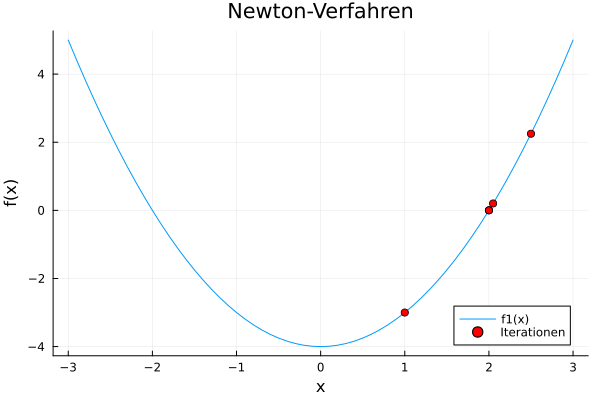

In [49]:
using Plots

# Definition der Funktionen
f1(x) = x^2 - 4            # (Nullstellen bei x = ±2)
f2(x) = sin(x)            # (Nullstellen bei x = 0, ±π, ±2π, ...)
f3(x) = exp(x) - 2        # (Nullstelle bei x = ln(2))
f4(x) = x^3 - 2x^2 + x - 3  # (Nullstelle bei x = 2.174...))

# Auswertung der Funktionen
x1, max_iter1, x_iters1 = newton_auto(f1, 1.0, 0.0001, 1000)
x2, max_iter2, x_iters2 = newton_auto(f2, 1.0, 0.0001, 1000)
x3, max_iter3, x_iters3 = newton_auto(f3, 1.0, 0.0001, 1000)
x4, max_iter4, x_iters4 = newton_auto(f4, 5.0, 0.0001, 1000)

# Plotten der Ergebnisse
range = -3:0.1:3

plot(f1, range, label="f1(x)", title="Newton-Verfahren", xlabel="x", ylabel="f(x)")
scatter!(f1, x_iters1, label="Iterationen", color=:red)

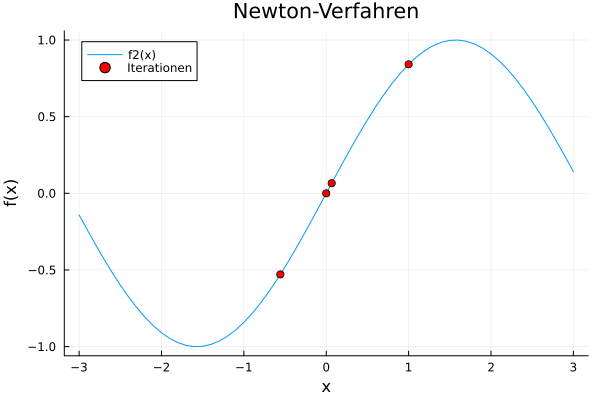

In [40]:
plot(f2, range, label="f2(x)", title="Newton-Verfahren", xlabel="x", ylabel="f(x)")
scatter!(f2, x_iters2, label="Iterationen", color=:red)

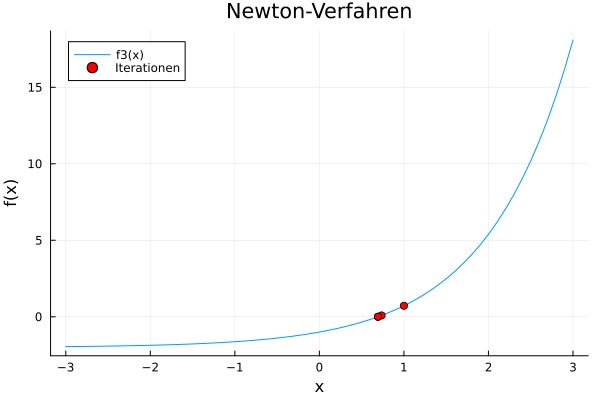

In [ ]:
plot(f3, range, label="f3(x)", title="Newton-Verfahren", xlabel="x", ylabel="f(x)")
scatter!(f3, x_iters3, label="Iterationen", color=:red)

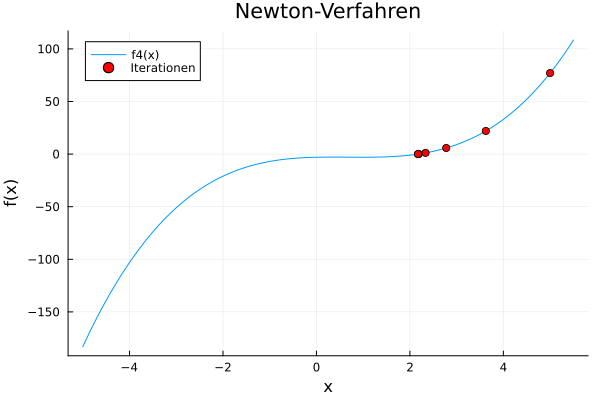

In [48]:
range = -5:0.1:5.5

plot(f4, range, label="f4(x)", title="Newton-Verfahren", xlabel="x", ylabel="f(x)")
scatter!(f4, x_iters4, label="Iterationen", color=:red)